<a href="https://colab.research.google.com/github/laxita-singh-robomq/sample/blob/main/trading_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
df=pdr.data.get_data_yahoo(["TSLA"])
df

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000
2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78670300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3439 entries, 2010-06-29 to 2024-02-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3439 non-null   float64
 1   High       3439 non-null   float64
 2   Low        3439 non-null   float64
 3   Close      3439 non-null   float64
 4   Adj Close  3439 non-null   float64
 5   Volume     3439 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.1 KB


In [ ]:
from datetime import datetime

In [ ]:
type(df)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

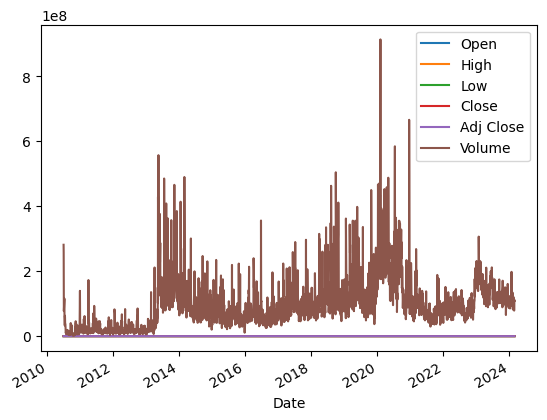

In [ ]:
df.plot()

<Axes: xlabel='Date'>

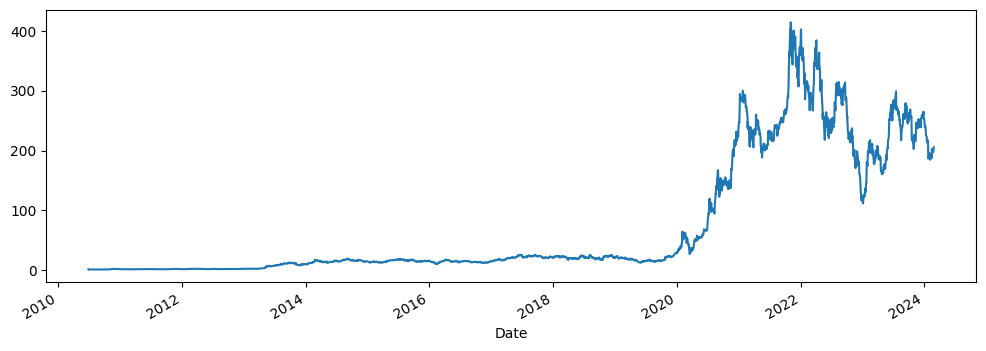

In [ ]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

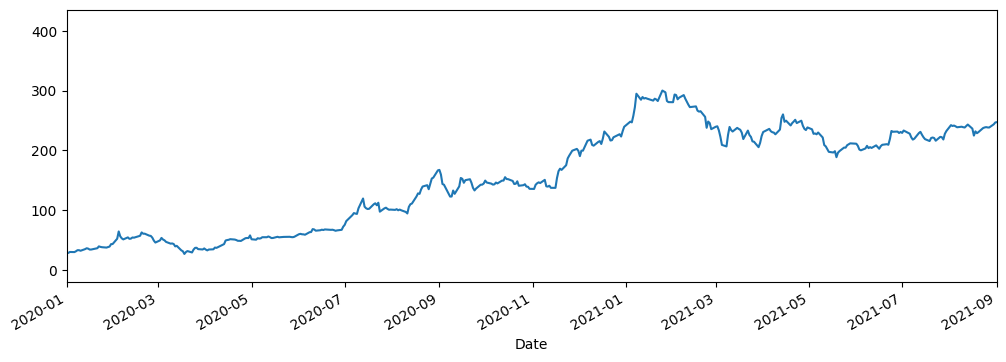

In [ ]:
df['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

In [ ]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
               '2024-02-26', '2024-02-27'],
              dtype='datetime64[ns]', name='Date', length=3439, freq=None)

In [ ]:
share_close=df.loc['2020-01-01':'2021-09-01']['Close']
share_close

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2021-08-26    233.720001
2021-08-27    237.306671
2021-08-30    243.636673
2021-08-31    245.240005
2021-09-01    244.696671
Name: Close, Length: 421, dtype: float64

<Axes: xlabel='Date'>

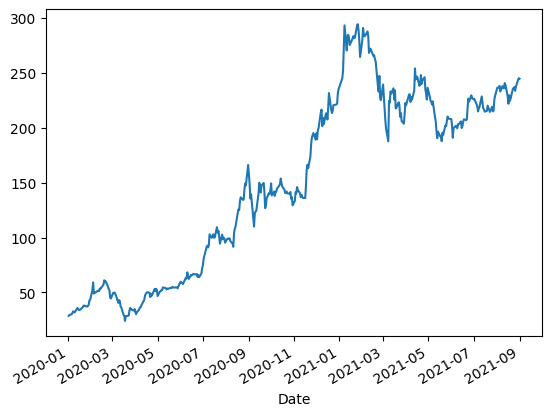

In [ ]:
share_close.plot()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
share_close=scaler.fit_transform(np.array(share_close).reshape(-1,1))

In [ ]:
share_close

array([[0.01702913],
       [0.02017399],
       [0.02227797],
       [0.02659938],
       [0.0322922 ],
       [0.02962831],
       [0.02884148],
       [0.04036278],
       [0.0435841 ],
       [0.03879405],
       [0.0375583 ],
       [0.0368208 ],
       [0.04587307],
       [0.05138831],
       [0.05203948],
       [0.05021915],
       [0.04854189],
       [0.05073219],
       [0.05420758],
       [0.06896255],
       [0.0713699 ],
       [0.10329458],
       [0.12970157],
       [0.09212106],
       [0.09563838],
       [0.09541886],
       [0.10114374],
       [0.10190837],
       [0.10015959],
       [0.10921432],
       [0.1082351 ],
       [0.1226324 ],
       [0.13719003],
       [0.13274777],
       [0.13313995],
       [0.1165622 ],
       [0.10820549],
       [0.10299859],
       [0.07838233],
       [0.07566664],
       [0.09432125],
       [0.09478742],
       [0.09577158],
       [0.08961504],
       [0.08442047],
       [0.06086975],
       [0.07007742],
       [0.067

In [ ]:

training_size=int(len(share_close)*0.65)
test_size=len(share_close)-training_size
train_data,test_data=share_close[0:training_size,:],share_close[training_size:len(share_close),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
print("In above line of code we have done , for Ex I have rates for few days like : 120,130,125,140,134,150  this is for training data\n now for testing we have 160,190,154,\nso our o/p should in form like we have 3 timestamp 120,130,125, so our o/p should be 140 next time i/p will be 130,125,140 so for this type of format the above code is written")

In above line of code we have done , for Ex I have rates for few days like : 120,130,125,140,134,150  this is for training data
 now for testing we have 160,190,154,
so our o/p should in form like we have 3 timestamp 120,130,125, so our o/p should be 140 next time i/p will be 130,125,140 so for this type of format the above code is written


In [ ]:
print("we will do for 100 time stamps, means 99 i/p will be there as independent feature and 100th value will be o/p ")

we will do for 100 time stamps, means 99 i/p will be there as independent feature and 100th value will be o/p 


In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
X_train

array([[0.01702913, 0.02017399, 0.02227797, ..., 0.1150354 , 0.11239126,
        0.11288209],
       [0.02017399, 0.02227797, 0.02659938, ..., 0.11239126, 0.11288209,
        0.11321755],
       [0.02227797, 0.02659938, 0.0322922 , ..., 0.11288209, 0.11321755,
        0.10966078],
       ...,
       [0.46263532, 0.41284782, 0.42680854, ..., 0.95504686, 0.99717578,
        1.        ],
       [0.41284782, 0.42680854, 0.31814425, ..., 0.99717578, 1.        ,
        0.97665402],
       [0.42680854, 0.31814425, 0.36262864, ..., 1.        , 0.97665402,
        0.94122181]])

In [ ]:
print(X_train.shape),print(y_train.shape)

(172, 100)
(172,)


(None, None)

In [ ]:
print(X_test.shape,y_test.shape)

(47, 100) (47,)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

#Stacked lstm mode

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 8s 508ms/step - loss: 0.1619 - val_loss: 0.0735
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0251 - val_loss: 0.1044
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0385 - val_loss: 0.0037
Epoch 4/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0109 - val_loss: 0.0253
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0205 - val_loss: 0.0273
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0164 - val_loss: 0.0042
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0105 - val_loss: 0.0148
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0090 - val_loss: 0.0022
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0059 - val_loss: 0.0019
Epoch 11/100
3/3 [

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.31096036562803

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

241.50173797953647

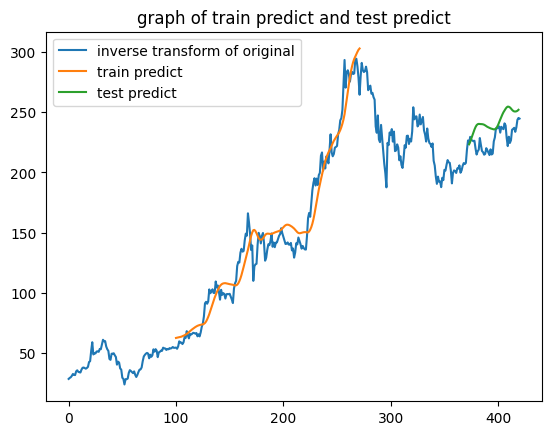

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(share_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(share_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(share_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(share_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('graph of train predict and test predict')
plt.legend(["inverse transform of original","train predict","test predict"])
plt.show()


In [ ]:
print(" In graph for time stamp 100 means for train predict : (orange color line):\n i/p : (0 to 99 days)\t o/p: (100th day)\t close price: near by 50\n i/p : (1 to 100 days)\t o/p: (101th day)\t close price: near by 50 ")

 In graph for time stamp 100 means for train predict : (orange color line):
 i/p : (0 to 99 days)	 o/p: (100th day)	 close price: near by 50
 i/p : (1 to 100 days)	 o/p: (101th day)	 close price: near by 50 


In [ ]:
len(test_data)

148

In [ ]:
print("as my test_data length is 148 that means we have share price of 148 days but if i want for 149th day i have to consider previous 100 days' share rate")

as my test_data length is 148 that means we have share price of 148 days but if i want for 149th day i have to consider previous 100 days' share rate


In [ ]:
x_input=test_data[48:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

[0.8510567972275255,
 0.8139473570891835,
 0.8221117195822601,
 0.8232586607330885,
 0.7922416821114794,
 0.7976187450131651,
 0.8286110527702876,
 0.7984820559049975,
 0.810457191907725,
 0.8213100576241108,
 0.7800445083283716,
 0.7672923812319814,
 0.7458333584440769,
 0.7858409194712639,
 0.7555762610788307,
 0.7416402147624158,
 0.7383596672464932,
 0.7292333668587047,
 0.7401232670993543,
 0.6866852148849939,
 0.6720832245926404,
 0.6384023571571413,
 0.6159566691549708,
 0.6382173539010247,
 0.6222957264064358,
 0.6235783290844074,
 0.6058067819387876,
 0.6345668563279363,
 0.6272904755911788,
 0.6588131222521643,
 0.6566549014776507,
 0.6744634266924668,
 0.688917504708035,
 0.6819740959592469,
 0.6803461576335289,
 0.6571851839264463,
 0.6173749333600855,
 0.649699185524153,
 0.6571975475862234,
 0.655298286206219,
 0.6493662135361835,
 0.6633516015815718,
 0.6630679148675084,
 0.672687519634896,
 0.6500814992410957,
 0.6568768828029636,
 0.6713432680232415,
 0.679618564723907

In [ ]:
print(" close price for next 30 days\n")
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("\n{} day input \t{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

 close price for next 30 days

[0.8531935]
101

1 day input 	[0.81394736 0.82211172 0.82325866 0.79224168 0.79761875 0.82861105
 0.79848206 0.81045719 0.82131006 0.78004451 0.76729238 0.74583336
 0.78584092 0.75557626 0.74164021 0.73835967 0.72923337 0.74012327
 0.68668521 0.67208322 0.63840236 0.61595667 0.63821735 0.62229573
 0.62357833 0.60580678 0.63456686 0.62729048 0.65881312 0.6566549
 0.67446343 0.6889175  0.6819741  0.68034616 0.65718518 0.61737493
 0.64969919 0.65719755 0.65529829 0.64936621 0.6633516  0.66306791
 0.67268752 0.6500815  0.65687688 0.67134327 0.67961856 0.67656
 0.68011187 0.72063746 0.74931122 0.73950661 0.76028738 0.75047046
 0.74916319 0.74696794 0.74817658 0.72434961 0.70593673 0.7160003
 0.7211061  0.75656287 0.73539978 0.71670328 0.71327476 0.70540645
 0.70787297 0.72548424 0.71905881 0.71162215 0.7043705  0.72193237
 0.70609706 0.70881029 0.74626501 0.75841279 0.78612461 0.78621093
 0.78766617 0.79224168 0.77308885 0.7911687  0.78651923 0.78384303
 0.801

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt

In [ ]:
len(share_close)

421

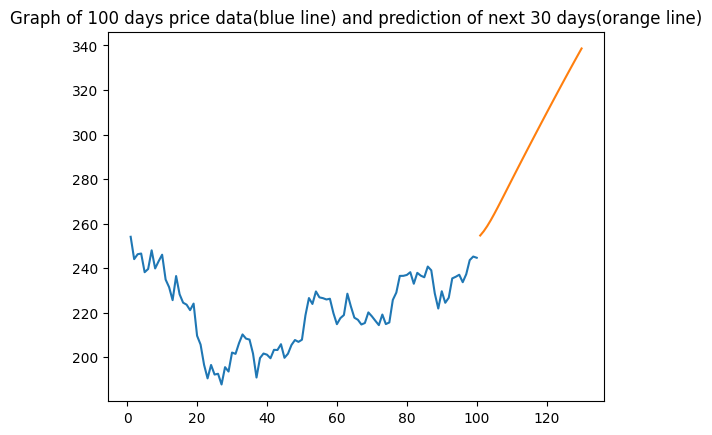

In [ ]:
plt.title("Graph of 100 days price data(blue line) and prediction of next 30 days(orange line)")
plt.plot(day_new,scaler.inverse_transform(share_close[321:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


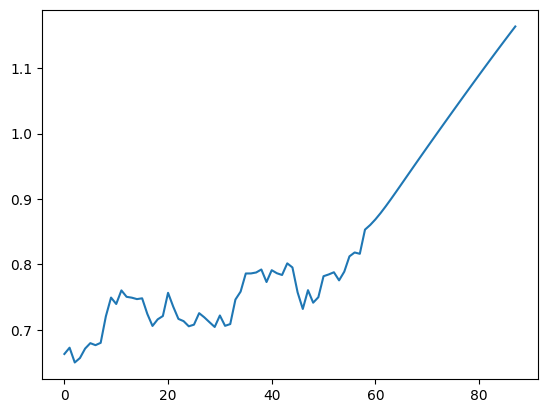

In [ ]:
df3=share_close.tolist()
df3.extend(lst_output)
plt.plot(df3[363:])

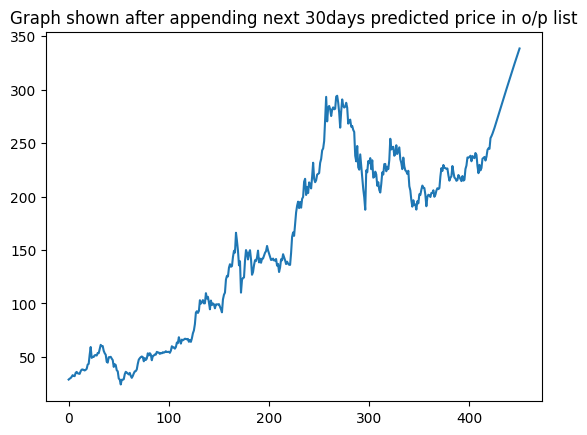

In [ ]:

df3=scaler.inverse_transform(df3).tolist()
plt.title("Graph shown after appending next 30days predicted price in o/p list")
plt.plot(df3)

In [ ]:
print("Average of next 30 days predicted close price : ",np.mean(scaler.inverse_transform(lst_output)))

Average of next 30 days predicted close price :  296.0873322312993
